In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import matplotlib as mpl
import matplotlib.pyplot as plt

### Exercise 1: Confident limits for Poisson distributed processes

$$P(n\leq N) = \sum_{n=0}^{N}\frac{\lambda^{n}}{n!}\exp{(-\lambda)}$$

$$P(n\geq N) = \sum_{n=N}^{\inf}\frac{\lambda^{n}}{n!}\exp{(-\lambda)} = 1 - \sum_{n=0}^{N-1}\frac{\lambda^{n}}{n!}\exp{(-\lambda)}$$

Looking for $N$ for which $P=10\%$

In [2]:
def CI_givenExp(l, mode='below'):
    N = np.linspace(0,100,101)
    
    if mode == 'below':
        previous_P = 0
        N_CI = 0
        for nu in N:
            if scp.stats.poisson.cdf(nu,l) > 0.1 and previous_P < 0.1:
                N_CI = nu-1
                break
            else:
                previous_P = scp.stats.poisson.cdf(nu,l)
        return N_CI
        
    elif mode == 'above':
        previous_P = 0
        N_CI = 0
        for nu in N:
            if (1-scp.stats.poisson.cdf(nu-1,l)) < 0.1 and previous_P > 0.1:
                N_CI = nu-1
                break
            else:
                previous_P = 1-scp.stats.poisson.cdf(nu-1,l)
        return N_CI
    elif mode == 'central':
        previous_P = 0
        Np_CI = 0
        Nm_CI = 0
        for nu in N:
            if scp.stats.poisson.cdf(nu,l) > 0.05 and previous_P < 0.05:
                Np_CI = nu-1
                break
            else:
                previous_P = scp.stats.poisson.cdf(nu,l)
        previous_P = 0
        for nu in N:
            if (1-scp.stats.poisson.cdf(nu-1,l)) < 0.05 and previous_P > 0.05:
                Nm_CI = nu-1
                break
            else:
                previous_P = 1-scp.stats.poisson.cdf(nu-1,l)
        return (Nm_CI,Np_CI)
            

In [3]:
ls = np.linspace(1,12,12)
for l in ls:
    print ('lambda = ', l, '\t N_obs(P=10\%) = ', CI_givenExp(l,mode='below'))

lambda =  1.0 	 N_obs(P=10\%) =  -1.0
lambda =  2.0 	 N_obs(P=10\%) =  -1.0
lambda =  3.0 	 N_obs(P=10\%) =  0.0
lambda =  4.0 	 N_obs(P=10\%) =  1.0
lambda =  5.0 	 N_obs(P=10\%) =  1.0
lambda =  6.0 	 N_obs(P=10\%) =  2.0
lambda =  7.0 	 N_obs(P=10\%) =  3.0
lambda =  8.0 	 N_obs(P=10\%) =  4.0
lambda =  9.0 	 N_obs(P=10\%) =  4.0
lambda =  10.0 	 N_obs(P=10\%) =  5.0
lambda =  11.0 	 N_obs(P=10\%) =  6.0
lambda =  12.0 	 N_obs(P=10\%) =  7.0


In [4]:
for l in ls:
    print ('lambda = ', l, '\t N_obs(P=10\%) = ', CI_givenExp(l,mode='above'))

lambda =  1.0 	 N_obs(P=10\%) =  2.0
lambda =  2.0 	 N_obs(P=10\%) =  4.0
lambda =  3.0 	 N_obs(P=10\%) =  5.0
lambda =  4.0 	 N_obs(P=10\%) =  7.0
lambda =  5.0 	 N_obs(P=10\%) =  8.0
lambda =  6.0 	 N_obs(P=10\%) =  9.0
lambda =  7.0 	 N_obs(P=10\%) =  10.0
lambda =  8.0 	 N_obs(P=10\%) =  12.0
lambda =  9.0 	 N_obs(P=10\%) =  13.0
lambda =  10.0 	 N_obs(P=10\%) =  14.0
lambda =  11.0 	 N_obs(P=10\%) =  15.0
lambda =  12.0 	 N_obs(P=10\%) =  17.0


In [5]:
for l in ls:
    print ('lambda = ', l, '\t N_lower = ', CI_givenExp(l,mode='central')[1], '\t N_upper = ', CI_givenExp(l,mode='central')[0])

lambda =  1.0 	 N_lower =  -1.0 	 N_upper =  3.0
lambda =  2.0 	 N_lower =  -1.0 	 N_upper =  5.0
lambda =  3.0 	 N_lower =  0.0 	 N_upper =  6.0
lambda =  4.0 	 N_lower =  0.0 	 N_upper =  8.0
lambda =  5.0 	 N_lower =  1.0 	 N_upper =  9.0
lambda =  6.0 	 N_lower =  1.0 	 N_upper =  10.0
lambda =  7.0 	 N_lower =  2.0 	 N_upper =  12.0
lambda =  8.0 	 N_lower =  3.0 	 N_upper =  13.0
lambda =  9.0 	 N_lower =  3.0 	 N_upper =  14.0
lambda =  10.0 	 N_lower =  4.0 	 N_upper =  15.0
lambda =  11.0 	 N_lower =  5.0 	 N_upper =  17.0
lambda =  12.0 	 N_lower =  6.0 	 N_upper =  18.0


In [6]:
def CI_givenObs(nu, mode='below'):
    L = np.linspace(0,30,10000)
    it = 0
    if mode == 'below':
        previous_P = 0
        l_CI = 0
        for l in L:
            if scp.stats.poisson.cdf(nu-1,l) < 0.9 and previous_P > 0.9:
                l_CI = L[it-1]
                break
            else:
                previous_P = scp.stats.poisson.cdf(nu-1,l)
                it += 1
        return l_CI
        
    elif mode == 'above':
        previous_P = 0
        l_CI = 0
        for l in L:
            if (1-scp.stats.poisson.cdf(nu,l)) > 0.9 and previous_P < 0.9:
                l_CI = L[it-1]
                break
            else:
                previous_P = 1-scp.stats.poisson.cdf(nu,l)
                it += 1
        return l_CI
        
    elif mode == 'central':
        previous_P = 0
        lp_CI = 0
        lm_CI = 0
        for l in L:
            if scp.stats.poisson.cdf(nu,l) < 0.05 and previous_P > 0.05:
                lp_CI = L[it-1]
                break
            else:
                previous_P = scp.stats.poisson.cdf(nu,l)
                it += 1
        previous_P = 0
        it = 0
        for l in L:
            if nu == 0:
                lm_CI = 0
                break
            if (1-scp.stats.poisson.cdf(nu-1,l)) > 0.05 and previous_P < 0.05:
                lm_CI = L[it-1]
                break
            else:
                previous_P = 1-scp.stats.poisson.cdf(nu-1,l)
                it += 1
        return (lm_CI,lp_CI)

In [7]:
# lower limits
ns = np.linspace(0,12,13)
for n in ns:
    print ('N_obs = ', n, '\t lambda(P=10\%) = ', CI_givenObs(n,mode='below'))

N_obs =  0.0 	 lambda(P=10\%) =  0
N_obs =  1.0 	 lambda(P=10\%) =  0.10501050105010501
N_obs =  2.0 	 lambda(P=10\%) =  0.5310531053105311
N_obs =  3.0 	 lambda(P=10\%) =  1.101110111011101
N_obs =  4.0 	 lambda(P=10\%) =  1.7431743174317431
N_obs =  5.0 	 lambda(P=10\%) =  2.43024302430243
N_obs =  6.0 	 lambda(P=10\%) =  3.1503150315031503
N_obs =  7.0 	 lambda(P=10\%) =  3.894389438943894
N_obs =  8.0 	 lambda(P=10\%) =  4.653465346534653
N_obs =  9.0 	 lambda(P=10\%) =  5.4305430543054305
N_obs =  10.0 	 lambda(P=10\%) =  6.219621962196219
N_obs =  11.0 	 lambda(P=10\%) =  7.020702070207021
N_obs =  12.0 	 lambda(P=10\%) =  7.827782778277827


In [8]:
# upper limits
for n in ns:
    print ('N_obs = ', n, '\t lambda(P=10\%) = ', CI_givenObs(n,mode='above'))

N_obs =  0.0 	 lambda(P=10\%) =  2.301230123012301
N_obs =  1.0 	 lambda(P=10\%) =  3.888388838883888
N_obs =  2.0 	 lambda(P=10\%) =  5.31953195319532
N_obs =  3.0 	 lambda(P=10\%) =  6.678667866786678
N_obs =  4.0 	 lambda(P=10\%) =  7.9927992799279926
N_obs =  5.0 	 lambda(P=10\%) =  9.273927392739273
N_obs =  6.0 	 lambda(P=10\%) =  10.53105310531053
N_obs =  7.0 	 lambda(P=10\%) =  11.77017701770177
N_obs =  8.0 	 lambda(P=10\%) =  12.994299429942993
N_obs =  9.0 	 lambda(P=10\%) =  14.203420342034203
N_obs =  10.0 	 lambda(P=10\%) =  15.406540654065406
N_obs =  11.0 	 lambda(P=10\%) =  16.597659765976598
N_obs =  12.0 	 lambda(P=10\%) =  17.779777977797778


In [9]:
# central limits
for n in ns:
    print ('N_obs = ', n, '\t lambda_lower = ', CI_givenObs(n,mode='central')[0], '\t lambda_upper = ', CI_givenObs(n,mode='central')[1])

N_obs =  0.0 	 lambda_lower =  0 	 lambda_upper =  2.994299429942994
N_obs =  1.0 	 lambda_lower =  0.051005100510051 	 lambda_upper =  4.743474347434743
N_obs =  2.0 	 lambda_lower =  0.354035403540354 	 lambda_upper =  6.294629462946294
N_obs =  3.0 	 lambda_lower =  0.816081608160816 	 lambda_upper =  7.7527752775277525
N_obs =  4.0 	 lambda_lower =  1.3651365136513651 	 lambda_upper =  9.15091509150915
N_obs =  5.0 	 lambda_lower =  1.9681968196819681 	 lambda_upper =  10.51005100510051
N_obs =  6.0 	 lambda_lower =  2.6102610261026102 	 lambda_upper =  11.842184218421842
N_obs =  7.0 	 lambda_lower =  3.282328232823282 	 lambda_upper =  13.147314731473147
N_obs =  8.0 	 lambda_lower =  3.978397839783978 	 lambda_upper =  14.434443444344433
N_obs =  9.0 	 lambda_lower =  4.692469246924692 	 lambda_upper =  15.703570357035703
N_obs =  10.0 	 lambda_lower =  5.424542454245424 	 lambda_upper =  16.96069606960696
N_obs =  11.0 	 lambda_lower =  6.168616861686168 	 lambda_upper =  18.20

### Exercise 2: Proton Decays

In [10]:
import math

In [76]:
Nsamp = 6.022*10**32

l_lower, l_upper = CI_givenObs(7,mode="central")
print(l_lower, " <= <N_decays> <= ", l_upper)

3.282328232823282  <= <N_decays> <=  13.147314731473147


In [14]:
def posterior(nu,n):
    return (nu**(n-1)*np.exp(-nu))/scp.special.gamma(n)

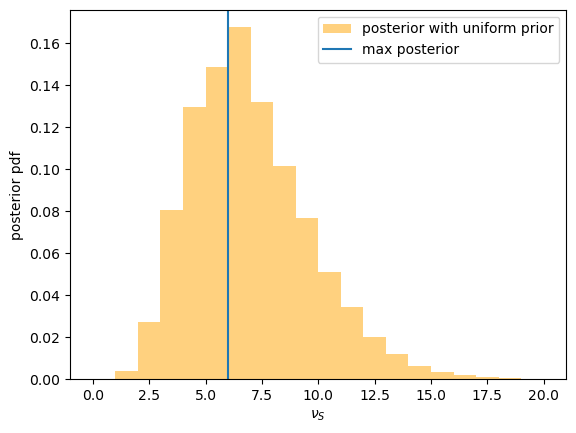

In [78]:
nus_unif = np.random.uniform(0,20,10000)
fsunif = np.array([posterior(nus_unif[i],7) for i in range(0,nus_unif.size)])

plt.hist(nus_unif,bins=20, density=True,weights=fsunif, color='orange', alpha=0.5, histtype='stepfilled', label='posterior with uniform prior')
plt.axvline(6, label="max posterior")
plt.xlabel('$\\nu_{S}$')
plt.ylabel('posterior pdf')
plt.legend()

In [79]:
def integral(lower, upper):
    integ = scp.integrate.quad(posterior, lower, upper, args=7) 
    return (integ[0]-0.9)

def optint(x):
    numax = 6
    lower = x[0]
    upper = x[1]
    return np.abs(upper-lower)


fit = scp.optimize.minimize(optint, x0=(3,10), method='SLSQP', constraints=({'type': 'ineq', 'fun': lambda x: integral(x[0],x[1])}))
fit
    

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 8.274685504002196
       x: [ 2.785e+00  1.106e+01]
     nit: 5
     jac: [-1.000e+00  1.000e+00]
    nfev: 15
    njev: 5

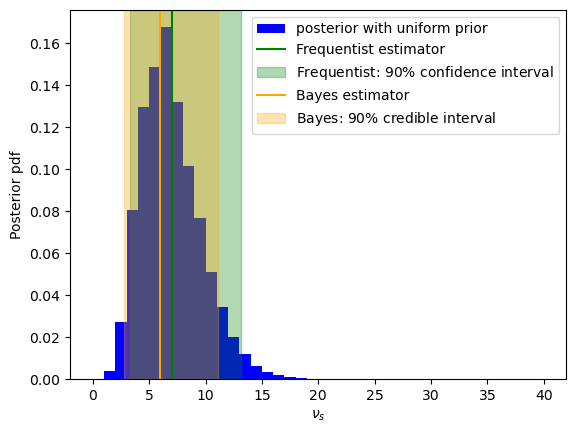

In [86]:
plt.hist(nus_unif,range=(0,40), bins=40, density=True,weights=fsunif, color='blue', histtype='stepfilled', label='posterior with uniform prior')
plt.axvline(7, color='green', label='Frequentist estimator')
plt.axvspan(3.28,13.15, color='green', label='Frequentist: $90\\%$ confidence interval', alpha=0.3)
plt.axvline(6, color='orange', label='Bayes estimator')
plt.axvspan(2.79,11.1,alpha=0.3, color='orange', label='Bayes: $90\\%$ credible interval')
plt.xlabel('$\\nu_{s}$')
plt.ylabel('Posterior pdf')
plt.legend()

Observation: Not only are the interpretations different - also the intervals derived in the frequentist and bayesian context are slightly different.